In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family']='NanumGothic'

## 데이터 확인

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

cooking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Cooking_data_set.csv')
error = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Error_Message.csv')
booking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/booking_data.csv', low_memory=False)
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Product_Name.csv', low_memory=False)

In [ ]:
cooking.head(3)

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55


In [ ]:
error.head(3)

,순번,생산라인코드,생산라인명,생산일자,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,품목코드,품목명,오류발생작업장명
0,10,D004,PET병,2011-01-03,14:16,14:24,8,W0056B4,위치조정,13D02080,참깨흑임자드레싱,충전실
1,7,D011,2동 오리히로,2011-01-04,18:54,19:03,9,W005711,대기,16A01016,시아스고구마샐러드믹스,충전실
2,2,C002,쿠커 #2,2011-01-05,9:51,9:58,7,W003452,충전,23K01321,나가사키베이스(재),쿠킹실


In [ ]:
booking.head(3)

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,수주단위,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,기준단가,생산지시,수주수량
0,60.0,20151214,436,SI0275,sc600,1BA03008,EA,1.5,1.5,0.0,0.0,0,Y,20151215,0.0,N,5.0
1,60.0,20151214,437,SI0275,sc600,1BA03059,EA,0.9,0.9,0.0,0.0,0,Y,20151215,0.0,N,3.0
2,60.0,20151214,438,SI0275,sc600,1BA03058,EA,0.9,0.9,0.0,0.0,0,Y,20151215,0.0,N,3.0


In [ ]:
booking[booking['수주품목코드']=='13K03115']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,수주단위,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,기준단가,생산지시,수주수량
145,20.0,20151214,234,IJ9451,400,13K03115,kg,11.0,11.0,4025.0,44275.0,4428,Y,20151215,4025.0,N,0.0
153,20.0,20151214,257,IJ9453,400,13K03115,kg,3.0,3.0,4025.0,12075.0,1208,Y,20151215,4025.0,N,0.0
163,20.0,20151214,267,IJ9454,400,13K03115,kg,2.0,2.0,4025.0,8050.0,805,Y,20151215,4025.0,N,0.0
174,20.0,20151214,278,IK0146,400,13K03115,kg,3.0,3.0,4025.0,12075.0,1208,Y,20151215,4025.0,N,0.0
190,20.0,20151215,3,IO598,400,13K03115,kg,150.0,150.0,0.0,0.0,0,Y,20151216,0.0,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756525,60.0,20211102,2,SI0153,400,13K03115,EA,0.0,50.0,4000.0,181819.0,18181,N,20211103,4000.0,N,50.0
1756676,20.0,20211102,230,IJ9455,202,13K03115,kg,0.0,120.0,3060.0,367200.0,36720,N,20211102,3060.0,N,0.0
1756977,20.0,20211102,15,IJ9451,202,13K03115,kg,19.0,19.0,4025.0,76475.0,7648,N,20211102,4025.0,N,0.0
1757025,20.0,20211102,63,IJ9454,202,13K03115,kg,1.0,1.0,4025.0,4025.0,403,N,20211102,4025.0,N,0.0


In [ ]:
booking[(booking['수주품목코드']=='13K03115')& (booking['출하완료여부']=='N')&(booking['출고수량KG']<=booking['수주수량KG'])]

In [ ]:
booking[booking['수주품목코드']=='23K03115']

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,수주단위,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,기준단가,생산지시,수주수량


In [ ]:
product[product['품목코드'].str.contains('6B04003', na=False)]

,품목코드,품목명,평균수주단가,Column 4
830,16B04003,해표골드마요네즈,4661.124903,NaN
2549,26B04003,해표골드마요네즈(재),NaN,NaN


In [ ]:
product[product['품목코드'].str.contains('3D02277', na=False)]

,품목코드,품목명,평균수주단가,Column 4
360,13D02277,참깨&흑임자드레싱-N 495g,2089.979321,NaN
1819,23D02277,참깨&흑임자드레싱-N 495g(재),NaN,NaN


In [ ]:
product[product['품목코드'].str.contains('2BA04003', na=False)]

,품목코드,품목명,평균수주단가,Column 4
2832,2BA04003,카모메냉동우동면8각/반개면(재),NaN,NaN


In [ ]:
product[product['품목코드']=='26B04003']

,품목코드,품목명,평균수주단가,Column 4
2549,26B04003,해표골드마요네즈(재),NaN,NaN


In [ ]:
booking['수주품목코드'].nunique()

6205

In [ ]:
product['품목코드'].nunique()

2835

In [ ]:
product.head(3)

,품목코드,품목명,평균수주단가,Column 4
0,NaN,NaN,NaN,NaN
1,1.#JE+00,가쓰오다시국물900ml,NaN,NaN
2,11501122,조미액-갈릭라이스3kg,NaN,NaN


In [ ]:
error.head(3)

,순번,생산라인코드,생산라인명,생산일자,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,품목코드,품목명,오류발생작업장명
0,10,D004,PET병,2011-01-03,14:16,14:24,8,W0056B4,위치조정,13D02080,참깨흑임자드레싱,충전실
1,7,D011,2동 오리히로,2011-01-04,18:54,19:03,9,W005711,대기,16A01016,시아스고구마샐러드믹스,충전실
2,2,C002,쿠커 #2,2011-01-05,9:51,9:58,7,W003452,충전,23K01321,나가사키베이스(재),쿠킹실


## 데이터 전처리

### product/cooking 품목코드 앞자리 통일

In [7]:
# 필요한 컬럼만 서브셋
product_c = product[['품목코드','품목명']].copy()
product_c.dropna(subset=['품목코드'], inplace=True)
cooking_c = cooking.copy()
cooking_c.dropna(subset=['품목코드'], inplace=True)

In [8]:
# 품목코드에 특수문자 있는 데이터 삭제
product_c = product_c[product_c['품목코드'].str.isalnum()]
cooking_c = cooking_c[cooking_c['품목코드'].str.isalnum()]

In [9]:
# 앞자리 1로 통일
product_c['품목코드_통일'] = product['품목코드'].str.slice(start=1)
product_c['품목코드_통일'] = '1'+product_c['품목코드_통일']

cooking_c['품목코드_통일'] = cooking_c['품목코드'].str.slice(start=1)
cooking_c['품목코드_통일'] = '1'+cooking_c['품목코드_통일']

In [10]:
# 품목명에 결측치 있는 행 제거
product_c.dropna(subset=['품목명'], inplace=True)
cooking_c.dropna(subset=['품목명'], inplace=True)

In [11]:
# 인덱스 정리
product_c.reset_index(inplace=True)
cooking_c.reset_index(inplace=True)

In [12]:
# 컬럼 정리
product_c.drop('index', axis=1, inplace=True)
cooking_c.drop('index', axis=1, inplace=True)

### product에는 없는데 booking/cooking에 있는 데이터 삭제하기

In [ ]:
# product의 품목코드 리스트 생성
# pro_list = list(product_c['품목코드_통일'])

In [ ]:
# product의 품목코드 리스트에 booking 데이터의 수주품목코드를 비교해서 리스트에 있는 데이터만 추출
# booking_c = booking[booking['수주품목코드'].isin(pro_list)].copy()

# product의 품목코드 리스트에 cooking 데이터의 수주품목코드를 비교해서 리스트에 있는 데이터만 추출
# cooking_c = cooking_c[cooking_c['품목코드_통일'].isin(pro_list)].copy()

In [ ]:
# 품목코드에 특수문자 있는 데이터 삭제
# booking_c = booking_c[booking_c['수주품목코드'].str.isalnum()].copy()
# cooking_c = cooking_c[cooking_c['품목코드_통일'].str.isalnum()].copy()

In [ ]:
# 인덱스 정리
# booking_c.reset_index(inplace=True)
# booking_c.drop('index', axis=1, inplace=True)

# cooking_c.reset_index(inplace=True)
# cooking_c.drop('index', axis=1, inplace=True)


### 2019년도 이후 데이터만 추출

In [13]:
booking_c = booking.copy()

In [14]:
# 결측치 제거
booking_c.dropna(subset=['수주일자'], inplace=True)

In [15]:
# 수주일자 문자열로 형변환
booking_c['수주일자'] = booking_c['수주일자'].astype('str')

In [16]:
# booking의 2019년도 데이터
booking_c = booking_c[booking_c['수주일자'].str.slice(start=0, stop=4).apply(lambda x: int(x)) > 2018].copy()

In [17]:
# 결측치 제거
cooking_c.dropna(subset=['생산일자'], inplace=True)

In [18]:
# cooking_c 2019년도 데이터
cooking_c = cooking_c[cooking_c['생산일자'].str.slice(start=0, stop=4).apply(lambda x: int(x)) > 2018].copy()

### booking과 product 머지

In [19]:
# 필요한 컬럼만 뽑아서 booking 서브셋 생성
booking_c = booking_c[['수주일련번호','수주부서','수주일자','수주품목코드', '수주단위' ,'출고수량KG', '수주수량KG', '출하완료여부', '납기일자']].copy()

In [ ]:
# product 와 booking 머지
product_booking = product_c.merge(booking_c, how='inner', left_on='품목코드_통일', right_on='수주품목코드')
product_booking

In [21]:
# 결측치 제거
product_booking.dropna(subset=['품목코드_통일','수주수량KG'], inplace=True)

In [22]:
# 컬럼 제거
product_booking.drop('수주품목코드',axis=1,inplace=True)

In [24]:
# 필요한 컬럼만 뽑아서 cooking 서브셋 생성
cooking_c = cooking_c[['생산라인코드','생산일자','품목코드_통일', '작업장코드' ,'생산시간']]

In [25]:
# product_booking 와 cooking 머지
product_booking_cooking = product_booking.merge(cooking_c, how='inner', left_on='품목코드_통일' , right_on='품목코드_통일')

In [26]:
# 결측치 제거
product_booking_cooking.dropna(subset=['품목코드_통일','수주수량KG'], inplace=True)

In [29]:
product_booking_cooking.dropna(subset=['수주부서'], inplace=True)

In [ ]:
# 컬럼정리
product_booking_cooking.drop('수주일련번호', axis=1, inplace=True)

In [48]:
product_booking_cooking.drop('품목코드', axis=1, inplace=True)

### 전체 데이터 이상치 제거

In [50]:
# 코드리스트
code_list = product_booking_cooking['품목코드_통일'].unique()
len(code_list)

774

In [51]:
# product_booking_cooking 이상치 삭제 함수
def no_ideal(x):
    df=product_booking_cooking[product_booking_cooking['품목코드_통일']==str(x)]
    q =df.quantile([.25,.75])
    q1 = q.iloc[0,2]
    q2 = q.iloc[1,2]
    i = q2-q1
    i1 = q1 - 1.5*i
    i2 = q2 + 1.5*i 
    df = df[(df['수주수량KG']>i1) & (df['수주수량KG']<i2)]
    return df

In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# 코드 리스트에 함수 적용 - product_booking 이상치 삭제
import time
from tqdm import tqdm

product_booking_cooking_no_ideal = pd.DataFrame()
for c in tqdm(code_list):
    product_booking_cooking_no_ideal = pd.concat([product_booking_cooking_no_ideal,no_ideal(c)])

100%|██████████| 774/774 [06:32<00:00,  1.97it/s]


In [53]:
len(product_booking_cooking_no_ideal)

233960

In [54]:
# csv로 저장
product_booking_cooking_no_ideal.to_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/product_booking_cooking_no_ideal.csv')

In [2]:
# 불러오는 코드
import pandas as pd
product_booking_cooking_no_ideal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/product_booking_cooking_no_ideal.csv',low_memory=False)


In [6]:
# 불러왔을 때 컬럼 정리
product_booking_cooking_no_ideal.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
product_booking_cooking_no_ideal.head()

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간
0,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.0,72.0,Y,20200401,P002,2019-07-30,W007,73.90
1,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.0,72.0,Y,20200401,C001,2020-12-16,W003,76.42
2,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.0,72.0,Y,20190124,P002,2019-07-30,W007,73.90
3,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.0,72.0,Y,20190124,C001,2020-12-16,W003,76.42
4,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.0,72.0,Y,20190103,P002,2019-07-30,W007,73.90


### 상관분석

In [10]:
product_booking_cooking_no_ideal.corr(method='pearson')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000,0.106159,0.027361,0.584507,0.021981
출고수량KG,0.106159,1.000000,0.141889,0.076755,0.008823
수주수량KG,0.027361,0.141889,1.000000,0.002606,0.037159
납기일자,0.584507,0.076755,0.002606,1.000000,0.014238
생산시간,0.021981,0.008823,0.037159,0.014238,1.000000


In [154]:
product_booking_cooking_no_ideal.corr(method='kendall')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000,0.108230,0.022947,0.997857,0.016098
출고수량KG,0.108230,1.000000,0.724842,0.108038,0.021376
수주수량KG,0.022947,0.724842,1.000000,0.022862,0.025920
납기일자,0.997857,0.108038,0.022862,1.000000,0.016051
생산시간,0.016098,0.021376,0.025920,0.016051,1.000000


In [155]:
product_booking_cooking_no_ideal.corr(method='spearman')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000,0.159306,0.034327,0.999656,0.024189
출고수량KG,0.159306,1.000000,0.723228,0.159057,0.030683
수주수량KG,0.034327,0.723228,1.000000,0.034205,0.037192
납기일자,0.999656,0.159057,0.034205,1.000000,0.024123
생산시간,0.024189,0.030683,0.037192,0.024123,1.000000


In [8]:
product_booking_cooking_no_ideal_code = product_booking_cooking_no_ideal.groupby('품목코드_통일').sum()

In [9]:
product_booking_cooking_no_ideal_code.corr(method='pearson')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000,0.998519,0.999853,1.000000,0.998463
출고수량KG,0.998519,1.000000,0.998717,0.998519,0.996363
수주수량KG,0.999853,0.998717,1.000000,0.999853,0.998252
납기일자,1.000000,0.998519,0.999853,1.000000,0.998463
생산시간,0.998463,0.996363,0.998252,0.998463,1.000000


In [11]:
product_booking_cooking_no_ideal_code_day = product_booking_cooking_no_ideal.groupby(['품목코드_통일','납기일자']).sum()

In [12]:
product_booking_cooking_no_ideal_code_day.corr(method='pearson')

,수주일자,출고수량KG,수주수량KG,생산시간
수주일자,1.000000,0.870239,0.997150,0.998474
출고수량KG,0.870239,1.000000,0.870844,0.867208
수주수량KG,0.997150,0.870844,1.000000,0.995761
생산시간,0.998474,0.867208,0.995761,1.000000


In [13]:
# 생산시간 기준 결측치 날리기
product_booking_cooking_no_ideal_no_nan = product_booking_cooking_no_ideal.dropna(subset=['생산시간']).copy()

In [14]:
#다시 상관분석
product_booking_cooking_no_ideal_no_nan.corr(method='pearson')
# 전보다 떨어짐

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000,0.105261,0.026849,0.596798,0.021981
출고수량KG,0.105261,1.000000,0.140593,0.076780,0.008823
수주수량KG,0.026849,0.140593,1.000000,0.003199,0.037159
납기일자,0.596798,0.076780,0.003199,1.000000,0.014238
생산시간,0.021981,0.008823,0.037159,0.014238,1.000000


생산시간 살리기로 결정

In [33]:
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
0,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,2020-03-31
1,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,2020-03-31
2,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-23
3,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,2019-01-23
4,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.00,72.00,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233955,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211019,EA,83.70,83.70,Y,20211019,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-19
233956,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,C098,2019-11-28,W003,76.88,2019-11-28,2021-10-25
233957,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-25
233958,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211101,EA,80.10,80.10,Y,20211031,C098,2019-11-28,W003,76.88,2019-11-28,2021-11-01


In [34]:
subset_corr = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목코드_통일'] == '1BA01045']

In [37]:
subset_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 233818 to 233959
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   품목명       142 non-null    object        
 1   품목코드_통일   142 non-null    object        
 2   수주부서      142 non-null    object        
 3   수주일자      142 non-null    int64         
 4   수주단위      142 non-null    object        
 5   출고수량KG    142 non-null    float64       
 6   수주수량KG    142 non-null    float64       
 7   출하완료여부    142 non-null    object        
 8   납기일자      142 non-null    int64         
 9   생산라인코드    142 non-null    object        
 10  생산일자      142 non-null    object        
 11  작업장코드     142 non-null    object        
 12  생산시간      142 non-null    float64       
 13  생산일자_년월일  142 non-null    datetime64[ns]
 14  수주일자_년월일  142 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(8)
memory usage: 17.8+ KB


In [35]:
subset_corr.corr(method='pearson')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
수주일자,1.000000e+00,1.435150e-01,-7.099946e-02,9.999983e-01,-4.383841e-15
출고수량KG,1.435150e-01,1.000000e+00,6.621748e-02,1.434279e-01,-5.123369e-16
수주수량KG,-7.099946e-02,6.621748e-02,1.000000e+00,-7.126976e-02,-1.041707e-16
납기일자,9.999983e-01,1.434279e-01,-7.126976e-02,1.000000e+00,-2.476493e-14
생산시간,-4.383841e-15,-5.123369e-16,-1.041707e-16,-2.476493e-14,1.000000e+00


### 품목코드별 연월

In [64]:
product_booking_cooking_no_ideal.tail(3)

,품목코드,품목명_x,품목코드_통일,수주일련번호,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산지시,생산라인코드,생산일자,작업장코드,생산시간
3395013,2BA02030,양송이포테이토크림생수프(재),1BA02030,54.0,202,20191023,EA,43.2,43.2,Y,20191023,N,C096,2019-04-27,W003,73.26
3395014,2BA02030,양송이포테이토크림생수프(재),1BA02030,36.0,202,20191024,EA,40.8,40.8,Y,20191024,N,C096,2019-04-27,W003,73.26
3395015,2BA02030,양송이포테이토크림생수프(재),1BA02030,37.0,202,20191025,EA,0.0,60.0,Y,20191025,N,C096,2019-04-27,W003,73.26


In [15]:
# 생산일자 형변환 (문자열)
product_booking_cooking_no_ideal['생산일자_년월일'] = product_booking_cooking_no_ideal['생산일자'].astype('str')

In [64]:
# 생산일자 확인
product_booking_cooking_no_ideal['생산일자_년월일'].sort_values(ascending = False)

7481657    2021-10-29
5466143    2021-10-29
5466407    2021-10-29
2449668    2021-10-28
2829743    2021-10-28
              ...    
2260807    2019-01-02
2261038    2019-01-02
2261087    2019-01-02
2261318    2019-01-02
2253912    2019-01-02
Name: 생산일자_년월일, Length: 233960, dtype: object

In [16]:
# 생산일자 형변환 (데이트타임)
product_booking_cooking_no_ideal['생산일자_년월일'] = pd.to_datetime(product_booking_cooking_no_ideal['생산일자'])

In [17]:
# 수주일자 형변환 (문자열)
product_booking_cooking_no_ideal['수주일자_년월일'] = product_booking_cooking_no_ideal['수주일자'].astype('str')

In [18]:
# 이상치 변경
product_booking_cooking_no_ideal['수주일자_년월일']= product_booking_cooking_no_ideal['수주일자_년월일'].apply(lambda x: x.replace('21210727','20210727'))
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
0,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,20200331
1,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,20200331
2,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,20190123
3,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,20190123
4,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.00,72.00,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,20190102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233955,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211019,EA,83.70,83.70,Y,20211019,L001,2020-02-24,W002,80.11,2020-02-24,20211019
233956,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,C098,2019-11-28,W003,76.88,2019-11-28,20211025
233957,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,L001,2020-02-24,W002,80.11,2020-02-24,20211025
233958,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211101,EA,80.10,80.10,Y,20211031,C098,2019-11-28,W003,76.88,2019-11-28,20211101


In [68]:
# 수주일자 확인
product_booking_cooking_no_ideal['수주일자_년월일'].sort_values(ascending = False)

7410052    20211102
3890100    20211102
3890102    20211102
3890103    20211102
3890104    20211102
             ...   
3628086    20190101
2212835    20190101
2212834    20190101
2212833    20190101
795584     20190101
Name: 수주일자_년월일, Length: 233960, dtype: object

In [19]:
# 수주일자 형변환 (데이트타임)
product_booking_cooking_no_ideal['수주일자_년월일'] = pd.to_datetime(product_booking_cooking_no_ideal['수주일자_년월일'])

In [70]:
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
930,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,2020-03-31
931,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,2020-03-31
1008,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-23
1009,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,2019-01-23
1012,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.00,72.00,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618876,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211019,EA,83.70,83.70,Y,20211019,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-19
7618885,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,C098,2019-11-28,W003,76.88,2019-11-28,2021-10-25
7618886,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-25
7618893,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211101,EA,80.10,80.10,Y,20211031,C098,2019-11-28,W003,76.88,2019-11-28,2021-11-01


In [20]:
# 결측치 확인
product_booking_cooking_no_ideal.isnull().sum()

품목명            0
품목코드_통일        0
수주부서           0
수주일자           0
수주단위           0
출고수량KG         0
수주수량KG         0
출하완료여부         0
납기일자           0
생산라인코드         0
생산일자           0
작업장코드          0
생산시간        9527
생산일자_년월일       0
수주일자_년월일       0
dtype: int64

In [ ]:
# # 연월 정리
# product_booking_no_ideal[product_booking_no_ideal['연월'].apply(lambda x: str(x)[1]!='0')]

,품목코드,품목명,품목코드_통일,수주일자,수주품목코드,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,연월
807972,16A01062,시아스감자샐러드,16A01062,0.0,16A01062,EA,40.0,40.0,Y,20170718,0.0
1937561,26A01062,시아스감자샐러드(재),16A01062,0.0,16A01062,EA,40.0,40.0,Y,20170718,0.0
984585,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,212107
984586,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,212107
2096731,26B06095,골드마요네즈3.2kg(캡파우치)(재),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,212107
2096732,26B06095,골드마요네즈3.2kg(캡파우치)(재),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,212107


In [ ]:
# 인덱스 찾기
# product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['연월'].apply(lambda x: str(x)[1]!='0')].index

Int64Index([807972, 1937561, 984585, 984586, 2096731, 2096732], dtype='int64')

In [ ]:
# 이상치 변경(연월의 '212107'를 '202107'로 변경)
# temp = product_booking_no_ideal[product_booking_no_ideal['연월']=='212107']
# temp['연월'] =temp['연월'].apply(lambda x: x.replace('212107','202107'))
# temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,품목코드,품목명,품목코드_통일,수주일자,수주품목코드,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,연월
984585,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107
984586,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107
2096731,26B06095,골드마요네즈3.2kg(캡파우치)(재),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107
2096732,26B06095,골드마요네즈3.2kg(캡파우치)(재),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107


In [ ]:
# # 삭제
# product_booking_no_ideal.drop(index=[984585, 984586, 2096731, 2096732], inplace=True)

In [ ]:
# # 합치기
# product_booking_no_ideal  = pd.concat([product_booking_no_ideal,temp])
# product_booking_no_ideal

,품목코드,품목명,품목코드_통일,수주일자,수주품목코드,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,연월
3,11501135,한식베이스소스2kg,11501135,20200525.0,11501135,kg,600.0,600.0,Y,20200602,202005
4,11501135,한식베이스소스2kg,11501135,20210406.0,11501135,kg,600.0,600.0,Y,20210426,202104
5,11501135,한식베이스소스2kg,11501135,20201229.0,11501135,kg,600.0,600.0,Y,20210107,202012
6,11501135,한식베이스소스2kg,11501135,20210108.0,11501135,kg,204.0,204.0,Y,20210113,202101
7,11501135,한식베이스소스2kg,11501135,20190221.0,11501135,kg,48.0,48.0,Y,20190225,201902
...,...,...,...,...,...,...,...,...,...,...,...
2204541,2D001003,모노치즈플레인크림치즈(재),1D001003,20181030.0,1D001003,EA,11.9,11.9,Y,20181031,201810
984585,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107
984586,16B06095,골드마요네즈3.2kg(캡파우치),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107
2096731,26B06095,골드마요네즈3.2kg(캡파우치)(재),16B06095,21210727.0,16B06095,EA,12.8,12.8,Y,21210727,202107


### 시각화 해보기

In [74]:
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
930,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,2020-03-31
931,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,2020-03-31
1008,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-23
1009,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,2019-01-23
1012,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.00,72.00,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618876,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211019,EA,83.70,83.70,Y,20211019,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-19
7618885,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,C098,2019-11-28,W003,76.88,2019-11-28,2021-10-25
7618886,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-25
7618893,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211101,EA,80.10,80.10,Y,20211031,C098,2019-11-28,W003,76.88,2019-11-28,2021-11-01


In [21]:
product_booking_cooking_no_ideal.nunique()

품목명          350
품목코드_통일      222
수주부서          10
수주일자         900
수주단위           2
출고수량KG       766
수주수량KG       747
출하완료여부         2
납기일자        1032
생산라인코드        40
생산일자         684
작업장코드          4
생산시간         942
생산일자_년월일     684
수주일자_년월일     900
dtype: int64

In [22]:
product_booking_cooking_no_ideal_code = pd.DataFrame()

In [ ]:
product_booking_cooking_no_ideal_code = product_booking_cooking_no_ideal.set_index('수주일자_년월일')

In [27]:
product_booking_cooking_no_ideal_code = product_booking_cooking_no_ideal.groupby('생산일자_년월일',as_index=False).sum()
product_booking_cooking_no_ideal_code

,생산일자_년월일,수주일자,출고수량KG,수주수량KG,납기일자,생산시간
0,2019-01-02,767276014,2420.00,3060.000,767275916,2943.48
1,2019-01-03,1817176170,5253.00,6783.000,1817176362,6715.86
2,2019-01-04,6907811314,20226.96,26216.200,6907811504,24478.22
3,2019-01-05,2463408250,6863.58,9119.460,2463408254,9137.46
4,2019-01-06,444355836,1584.00,1584.000,444355858,1617.66
...,...,...,...,...,...,...
679,2021-10-25,80801868,317.50,317.500,80801868,295.16
680,2021-10-26,1413745826,4354.56,5040.000,1413746006,5049.10
681,2021-10-27,3878369003,12237.99,14247.515,3878368897,14956.90
682,2021-10-28,17392271868,57969.65,64579.650,17392272951,66299.12


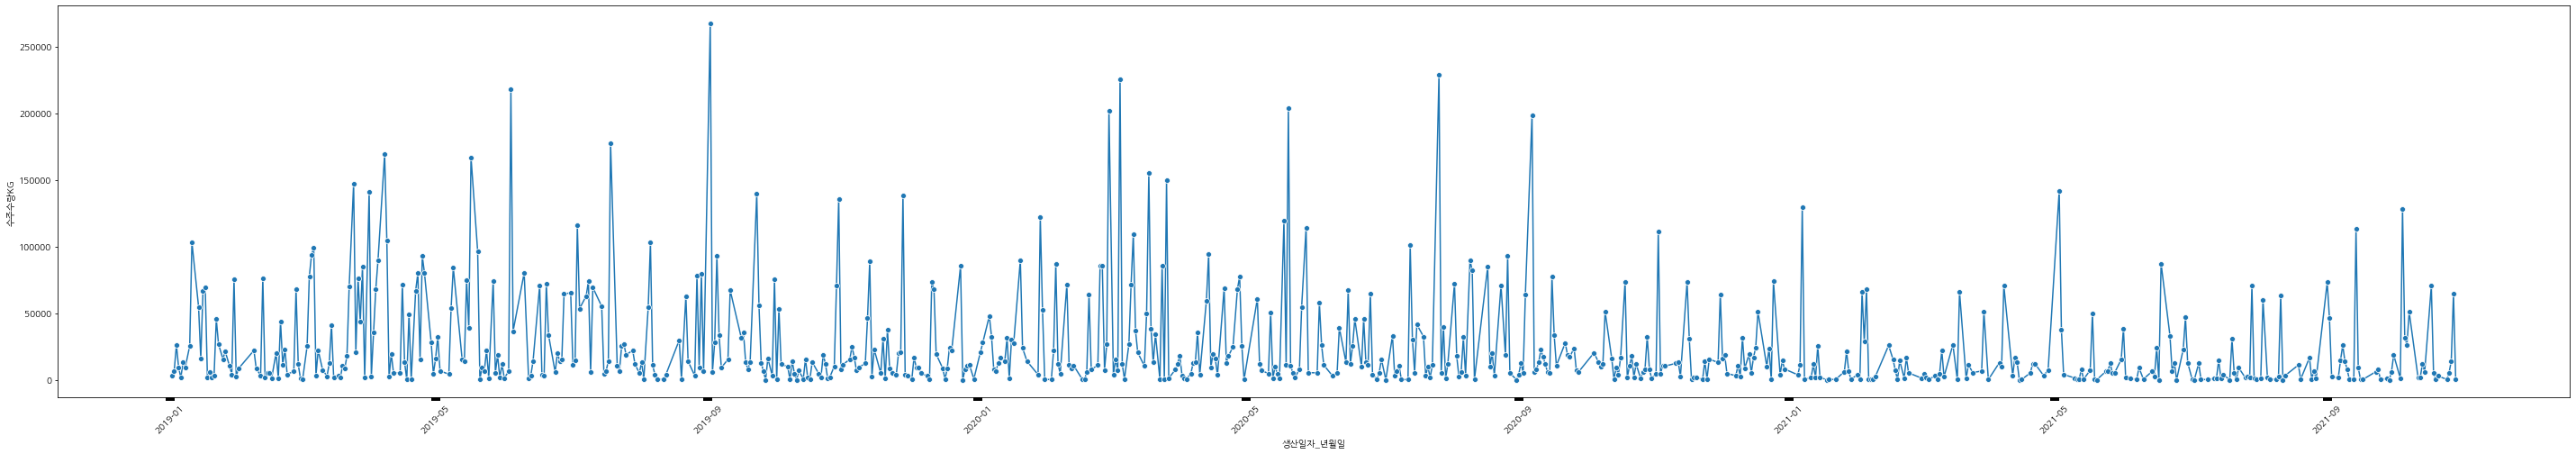

In [97]:
# 날짜-수량 라인플랏 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,8))
x=product_booking_cooking_no_ideal_code['생산일자_년월일']
y=product_booking_cooking_no_ideal_code['수주수량KG']
sns.lineplot(x=x,y=y,linestyle='-', marker='o')
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

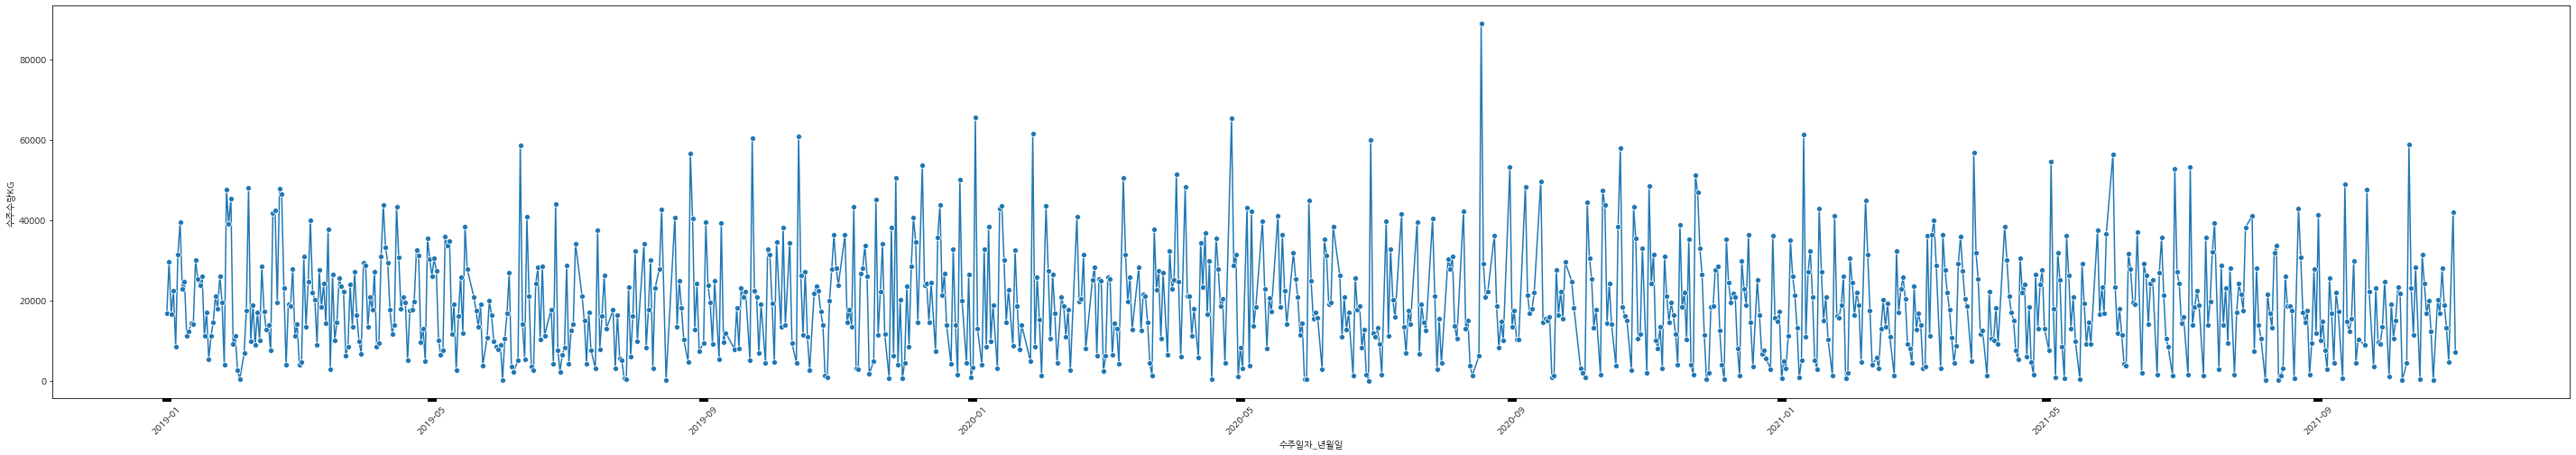

In [25]:
# 날짜-수량 라인플랏 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,8))
x=product_booking_cooking_no_ideal_code['수주일자_년월일']
y=product_booking_cooking_no_ideal_code['수주수량KG']
sns.lineplot(x=x,y=y,linestyle='-', marker='o')
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

# 전반적으로 감소하는 추세
# 전상품 총합 기준

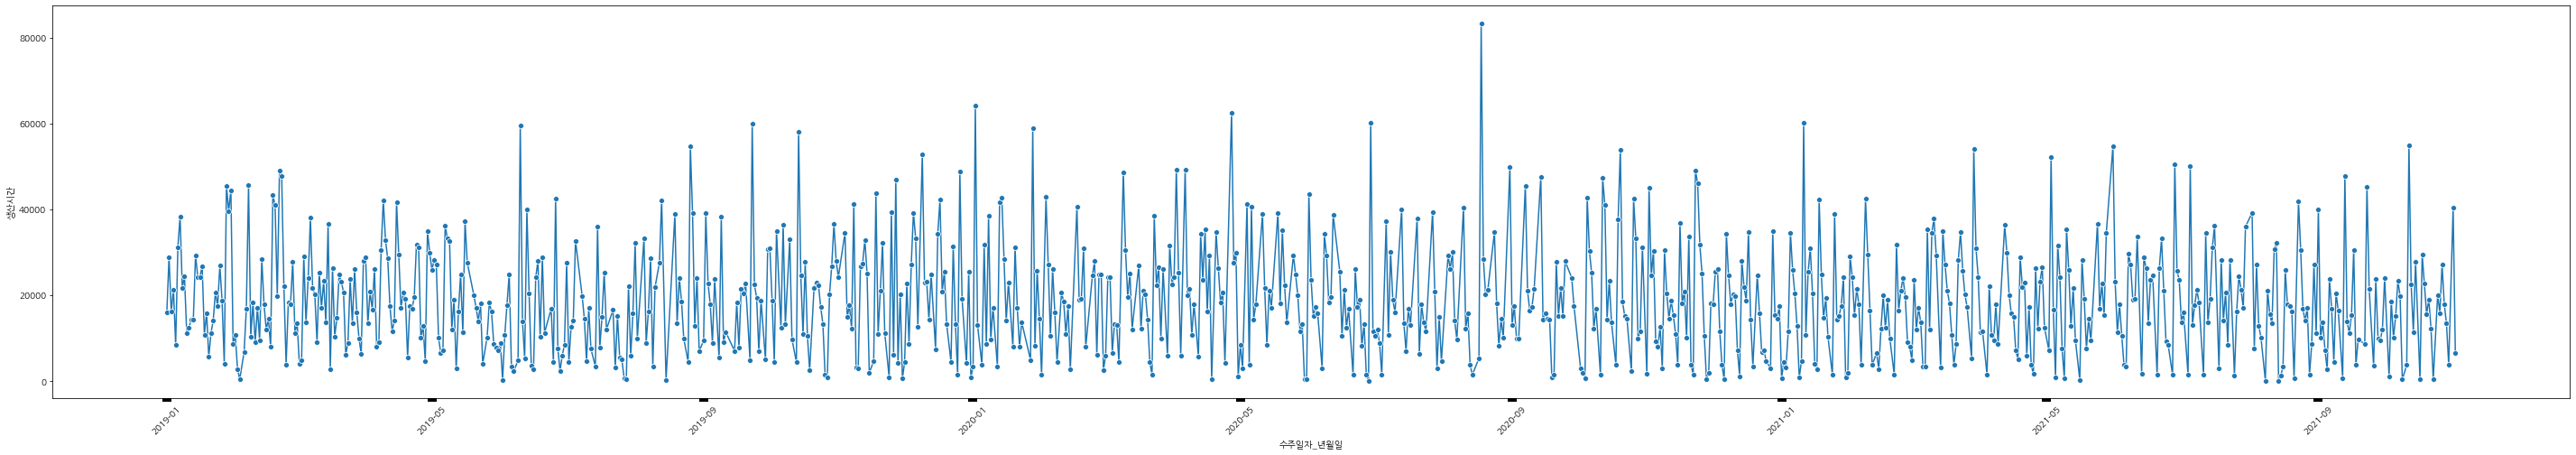

In [26]:
# 수주일자 - 생산시간 그래프
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,8))
x=product_booking_cooking_no_ideal_code['수주일자_년월일']
y=product_booking_cooking_no_ideal_code['생산시간']
sns.lineplot(x=x,y=y,linestyle='-', marker='o')
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

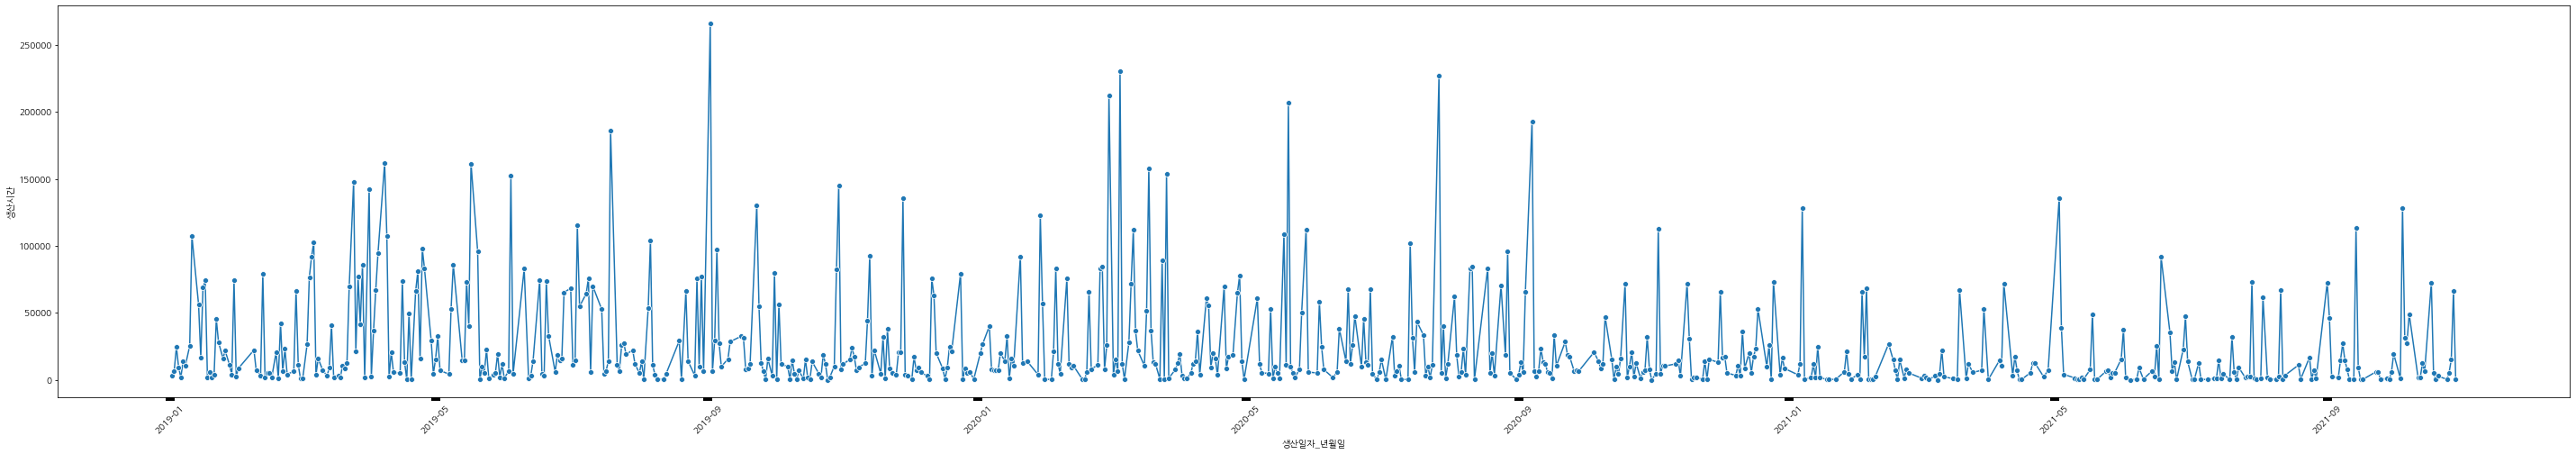

In [28]:
# 생산일자 - 생산시간 그래프
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,8))
x=product_booking_cooking_no_ideal_code['생산일자_년월일']
y=product_booking_cooking_no_ideal_code['생산시간']
sns.lineplot(x=x,y=y,linestyle='-', marker='o')
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [40]:
product_booking_cooking_no_ideal_work = product_booking_cooking_no_ideal.groupby('작업장코드', as_index=False)[['수주수량KG']].sum()
product_booking_cooking_no_ideal_work

,작업장코드,수주수량KG
0,W002,67546.510
1,W003,2567284.460
2,W005,9990925.182
3,W007,4883022.090


In [65]:
# W005 비율
9990925.182/17508778.242*100

57.062377762223306

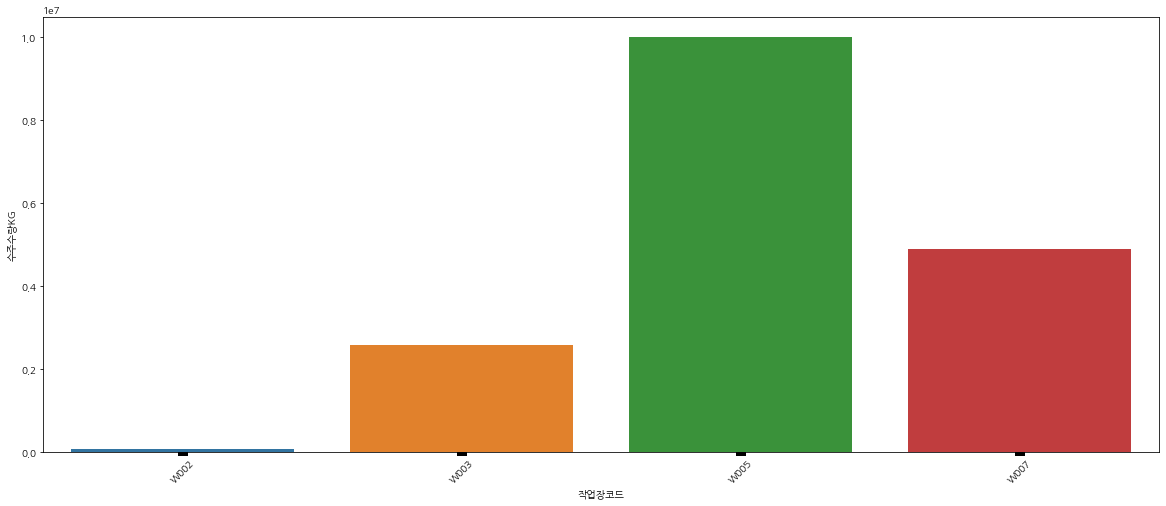

In [43]:
# 작업장-수량 라인플랏 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x=product_booking_cooking_no_ideal_work['작업장코드']
y=product_booking_cooking_no_ideal_work['수주수량KG']
sns.barplot(x=x,y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [45]:
product_booking_cooking_no_ideal_w5 = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['작업장코드']=='W005']
product_booking_cooking_no_ideal_w5

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
224,샘표핫갈비소스900g-NEW(캐나다),13A00591,400,20191130,EA,972.00,81.00,Y,20191130,D006,2019-05-21,W005,75.31,2019-05-21,2019-11-30
226,샘표핫갈비소스900g-NEW(캐나다),13A00591,400,20191130,EA,972.00,81.00,Y,20191130,D006,2019-05-21,W005,75.31,2019-05-21,2019-11-30
228,샘표핫갈비소스900g-NEW(캐나다)(재),13A00591,400,20191130,EA,972.00,81.00,Y,20191130,D006,2019-05-21,W005,75.31,2019-05-21,2019-11-30
230,샘표핫갈비소스900g-NEW(캐나다)(재),13A00591,400,20191130,EA,972.00,81.00,Y,20191130,D006,2019-05-21,W005,75.31,2019-05-21,2019-11-30
238,비빔장360g,13A00595,202,20210618,EA,82.08,82.08,Y,20210618,D006,2020-02-27,W005,74.90,2020-02-27,2021-06-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.00,75.00,Y,20211027,D088,2021-10-06,W005,72.80,2021-10-06,2021-10-27
232664,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.00,75.00,Y,20211027,D088,2021-10-06,W005,76.39,2021-10-06,2021-10-27
232665,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.00,75.00,Y,20211027,D088,2021-10-27,W005,72.02,2021-10-27,2021-10-27
232666,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.00,75.00,Y,20211027,D088,2021-10-27,W005,75.43,2021-10-27,2021-10-27


In [ ]:
product_booking_cooking_no_ideal

In [119]:
product_booking_cooking_no_ideal_source = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목명'].str.contains('소스')]
product_booking_cooking_no_ideal_source_index = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목명'].str.contains('소스')].index
product_booking_cooking_no_ideal_source
# 54416

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
0,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.0,72.0,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,2020-03-31,202003,201907
1,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.0,72.0,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,2020-03-31,202003,202012
2,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.0,72.0,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-23,201901,201907
3,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.0,72.0,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,2019-01-23,201901,202012
4,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.0,72.0,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-02,201901,201907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233807,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20210830,EA,77.5,77.5,Y,20210831,C096,2021-09-07,W003,75.62,2021-09-07,2021-08-30,202108,202109
233808,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20210906,EA,75.0,75.0,Y,20210906,C096,2021-09-07,W003,78.94,2021-09-07,2021-09-06,202109,202109
233809,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20210906,EA,75.0,75.0,Y,20210906,C096,2021-09-07,W003,75.62,2021-09-07,2021-09-06,202109,202109
233810,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20210906,EA,0.0,75.0,Y,20210907,C096,2021-09-07,W003,78.94,2021-09-07,2021-09-06,202109,202109


In [107]:
product_booking_cooking_no_ideal['수주일자_년월'] = product_booking_cooking_no_ideal['수주일자_년월일'].astype('str')

In [114]:
product_booking_cooking_no_ideal['생산일자_년월일'] = product_booking_cooking_no_ideal['생산일자_년월일'].astype('str')

In [112]:
product_booking_cooking_no_ideal['수주일자_년월'] = product_booking_cooking_no_ideal['수주일자_년월'].apply(lambda x: x.split('-')[0]+x.split('-')[1])

In [116]:
product_booking_cooking_no_ideal['생산일자_년월'] = product_booking_cooking_no_ideal['생산일자_년월일'].apply(lambda x: x.split('-')[0]+x.split('-')[1])

In [117]:
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
0,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,P002,2019-07-30,W007,73.90,2019-07-30,2020-03-31,202003,201907
1,시아스떡볶이양념소스,13A00010,sc600,20200331,EA,0.00,72.00,Y,20200401,C001,2020-12-16,W003,76.42,2020-12-16,2020-03-31,202003,202012
2,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-23,201901,201907
3,시아스떡볶이양념소스,13A00010,200,20190123,kg,72.00,72.00,Y,20190124,C001,2020-12-16,W003,76.42,2020-12-16,2019-01-23,201901,202012
4,시아스떡볶이양념소스,13A00010,200,20190102,EA,72.00,72.00,Y,20190103,P002,2019-07-30,W007,73.90,2019-07-30,2019-01-02,201901,201907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233955,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211019,EA,83.70,83.70,Y,20211019,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-19,202110,202002
233956,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,C098,2019-11-28,W003,76.88,2019-11-28,2021-10-25,202110,201911
233957,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211025,EA,74.25,74.25,Y,20211025,L001,2020-02-24,W002,80.11,2020-02-24,2021-10-25,202110,202002
233958,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20211101,EA,80.10,80.10,Y,20211031,C098,2019-11-28,W003,76.88,2019-11-28,2021-11-01,202111,201911


In [ ]:
# 소스 날짜-수량 시각화
product_booking_cooking_no_ideal_source_day = product_booking_cooking_no_ideal_source.groupby('수주일자_년월', as_index=False)[['수주수량KG']].sum('')
product_booking_cooking_no_ideal_source_day

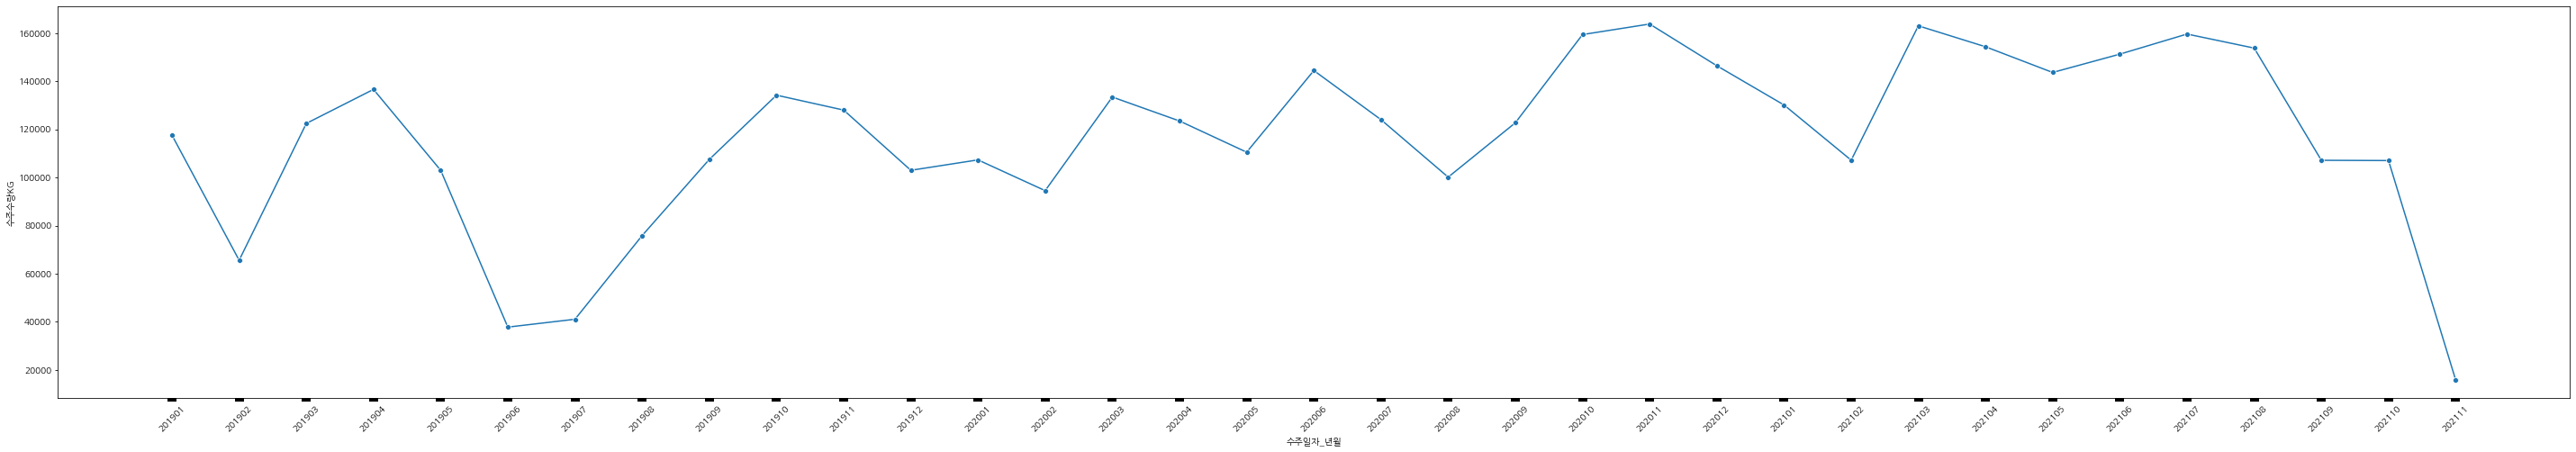

In [121]:
plt.figure(figsize=(50,8))
x=product_booking_cooking_no_ideal_source_day['수주일자_년월']
y=product_booking_cooking_no_ideal_source_day['수주수량KG']
sns.lineplot(x=x,y=y,linestyle='-', marker='o')
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [122]:
# 소스의 총수주수량
product_booking_cooking_no_ideal_source['수주수량KG'].sum()

4095738.49

In [130]:
product_booking_cooking_no_ideal_source_index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            233802, 233803, 233804, 233805, 233806, 233807, 233808, 233809,
            233810, 233811],
           dtype='int64', length=54416)

In [131]:
product_booking_cooking_no_ideal_no_source = product_booking_cooking_no_ideal.drop(product_booking_cooking_no_ideal_source_index).copy()

In [ ]:
product_booking_cooking_no_ideal_no_source

In [132]:
product_booking_cooking_no_ideal_bob = product_booking_cooking_no_ideal_no_source[(product_booking_cooking_no_ideal_no_source['품목명'].str.contains('밥'))]
product_booking_cooking_no_ideal_bob_index = product_booking_cooking_no_ideal_no_source[(product_booking_cooking_no_ideal_no_source['품목명'].str.contains('밥'))].index
product_booking_cooking_no_ideal_bob

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
204435,시아스야채볶음밥3kg,1BA03047,sc200,20190128,kg,84.0,84.0,Y,20190201,D088,2019-02-26,W005,73.42,2019-02-26,2019-01-28,201901,201902
204436,시아스야채볶음밥3kg,1BA03047,sc200,20190128,kg,84.0,84.0,Y,20190201,D088,2019-04-03,W005,77.49,2019-04-03,2019-01-28,201901,201904
204437,시아스야채볶음밥3kg,1BA03047,sc200,20190128,kg,84.0,84.0,Y,20190201,D088,2019-04-03,W005,78.81,2019-04-03,2019-01-28,201901,201904
204438,시아스야채볶음밥3kg,1BA03047,sc200,20190128,kg,84.0,84.0,Y,20190201,D088,2019-05-23,W005,73.46,2019-05-23,2019-01-28,201901,201905
204439,시아스야채볶음밥3kg,1BA03047,sc200,20190128,kg,84.0,84.0,Y,20190201,D088,2019-05-23,W005,NaN,2019-05-23,2019-01-28,201901,201905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.0,75.0,Y,20211027,D088,2021-10-06,W005,72.80,2021-10-06,2021-10-27,202110,202110
232664,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.0,75.0,Y,20211027,D088,2021-10-06,W005,76.39,2021-10-06,2021-10-27,202110,202110
232665,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.0,75.0,Y,20211027,D088,2021-10-27,W005,72.02,2021-10-27,2021-10-27,202110,202110
232666,(1)NEW새우볶음밥300g(칼로스쌀),1BA03681,202,20211027,kg,90.0,75.0,Y,20211027,D088,2021-10-27,W005,75.43,2021-10-27,2021-10-27,202110,202110


In [124]:
# 밥의 총 수주수량
product_booking_cooking_no_ideal_bob['수주수량KG'].sum()

2086268.652

In [133]:
product_booking_cooking_no_ideal_no_source_bob = product_booking_cooking_no_ideal_no_source.drop(product_booking_cooking_no_ideal_bob_index).copy()

In [134]:
product_booking_cooking_no_ideal_mayo = product_booking_cooking_no_ideal_no_source_bob[product_booking_cooking_no_ideal_no_source_bob['품목명'].str.contains('마요네즈')]
product_booking_cooking_no_ideal_mayo_index = product_booking_cooking_no_ideal_no_source_bob[product_booking_cooking_no_ideal_no_source_bob['품목명'].str.contains('마요네즈')].index
# 25076  

In [125]:
# mayo의 총 수주수량
product_booking_cooking_no_ideal_mayo['수주수량KG'].sum()

1885821.4799999997

In [135]:
product_booking_cooking_no_ideal_no_source_bob_mayo = product_booking_cooking_no_ideal_no_source_bob.drop(product_booking_cooking_no_ideal_mayo_index).copy()

In [136]:
product_booking_cooking_no_ideal_dress= product_booking_cooking_no_ideal_no_source_bob_mayo[product_booking_cooking_no_ideal_no_source_bob_mayo['품목명'].str.contains('드레싱')]
product_booking_cooking_no_ideal_dress_index =  product_booking_cooking_no_ideal_no_source_bob_mayo[product_booking_cooking_no_ideal_no_source_bob_mayo['품목명'].str.contains('드레싱')].index
product_booking_cooking_no_ideal_dress
# 42243   

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
10608,홈스타일발사믹드레싱,13D01285,202,20200521,EA,71.10,71.10,Y,20200522,P006,2019-01-17,W007,76.27,2019-01-17,2020-05-21,202005,201901
10609,홈스타일발사믹드레싱,13D01285,202,20200521,EA,71.10,71.10,Y,20200522,P006,2019-03-06,W007,71.59,2019-03-06,2020-05-21,202005,201903
10610,홈스타일발사믹드레싱,13D01285,202,20200521,EA,71.10,71.10,Y,20200522,P006,2019-03-06,W007,71.42,2019-03-06,2020-05-21,202005,201903
10611,홈스타일발사믹드레싱,13D01285,202,20200521,EA,71.10,71.10,Y,20200522,P006,2019-03-15,W007,72.01,2019-03-15,2020-05-21,202005,201903
10612,홈스타일발사믹드레싱,13D01285,202,20200521,EA,71.10,71.10,Y,20200522,P006,2019-04-08,W007,70.98,2019-04-08,2020-05-21,202005,201904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54004,홈플러스시그니처허니머스터드드레싱(재),13D04133,202,20201012,EA,81.84,81.84,Y,20201009,P0F0,2020-01-23,W007,79.26,2020-01-23,2020-10-12,202010,202001
54005,홈플러스시그니처허니머스터드드레싱(재),13D04133,202,20201012,EA,81.84,81.84,Y,20201009,P0F0,2020-01-23,W007,75.61,2020-01-23,2020-10-12,202010,202001
54006,홈플러스시그니처허니머스터드드레싱(재),13D04133,202,20201012,EA,81.84,81.84,Y,20201009,P004,2020-05-18,W007,72.61,2020-05-18,2020-10-12,202010,202005
54007,홈플러스시그니처허니머스터드드레싱(재),13D04133,202,20201012,EA,81.84,81.84,Y,20201009,C045,2021-06-29,W003,74.75,2021-06-29,2020-10-12,202010,202106


In [126]:
# dress의 총 수주수량
product_booking_cooking_no_ideal_dress['수주수량KG'].sum()

3147875.615

In [137]:
product_booking_cooking_no_ideal_no_source_bob_mayo_dress = product_booking_cooking_no_ideal_no_source_bob_mayo.drop(product_booking_cooking_no_ideal_dress_index).copy()

In [138]:
product_booking_cooking_no_ideal_salad= product_booking_cooking_no_ideal_no_source_bob_mayo_dress[product_booking_cooking_no_ideal_no_source_bob_mayo_dress['품목명'].str.contains('샐러드')]
product_booking_cooking_no_ideal_salad_index = product_booking_cooking_no_ideal_no_source_bob_mayo_dress[product_booking_cooking_no_ideal_no_source_bob_mayo_dress['품목명'].str.contains('샐러드')].index
product_booking_cooking_no_ideal_salad
# 69517  

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
30294,골드파인애플&골드키위저지방샐러드-N 235g,13D02244,200,20190205,EA,0.0,72.145,Y,20190205,P0F0,2019-01-08,W007,74.50,2019-01-08,2019-02-05,201902,201901
30295,골드파인애플&골드키위저지방샐러드-N 235g,13D02244,200,20190205,EA,0.0,72.145,Y,20190205,P0F0,2019-01-08,W007,79.65,2019-01-08,2019-02-05,201902,201901
30296,골드파인애플&골드키위저지방샐러드-N 235g,13D02244,200,20190205,EA,0.0,72.145,Y,20190205,P0F0,2019-01-08,W007,73.71,2019-01-08,2019-02-05,201902,201901
30297,골드파인애플&골드키위저지방샐러드-N 235g,13D02244,200,20190205,EA,0.0,72.145,Y,20190205,P0F0,2019-01-08,W007,73.53,2019-01-08,2019-02-05,201902,201901
30298,골드파인애플&골드키위저지방샐러드-N 235g,13D02244,200,20190205,EA,0.0,72.145,Y,20190205,P0F0,2019-01-08,W007,76.48,2019-01-08,2019-02-05,201902,201901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178583,콘치즈샐러드(재),16A03020,400,20210723,kg,70.0,70.000,Y,20210724,D011,2019-06-04,W005,79.21,2019-06-04,2021-07-23,202107,201906
178584,콘치즈샐러드(재),16A03020,400,20210723,kg,70.0,70.000,Y,20210724,D011,2019-07-04,W005,73.36,2019-07-04,2021-07-23,202107,201907
178585,콘치즈샐러드(재),16A03020,400,20210723,kg,70.0,70.000,Y,20210724,D011,2019-08-29,W005,72.21,2019-08-29,2021-07-23,202107,201908
178586,콘치즈샐러드(재),16A03020,400,20210723,kg,70.0,70.000,Y,20210724,D011,2020-01-20,W005,76.65,2020-01-20,2021-07-23,202107,202001


In [127]:
# salad의 총 수주수량
product_booking_cooking_no_ideal_salad['수주수량KG'].sum()

5162179.805

In [139]:
product_booking_cooking_no_ideal_no_source_bob_mayo_dress_salad = product_booking_cooking_no_ideal_no_source_bob_mayo_dress.drop(product_booking_cooking_no_ideal_salad_index).copy()

In [128]:
# 기타의 총 수주수량
product_booking_cooking_no_ideal_no_source_bob_mayo_dress_salad['수주수량KG'].sum()

1130894.2

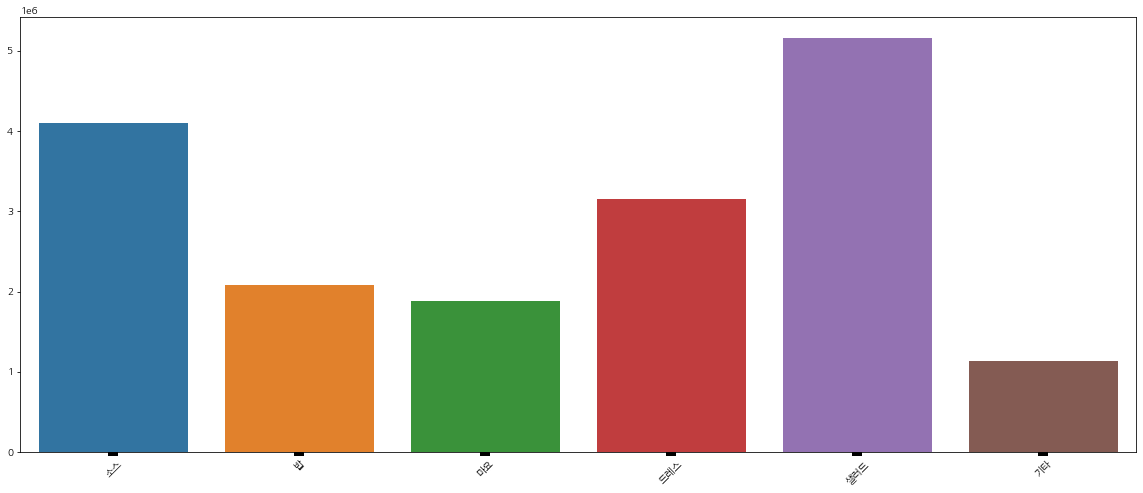

In [129]:
# 제품군-수량 바플랏 그리기
plt.figure(figsize=(20,8))
x=['소스','밥','마요','드레스','샐러드','기타']
y=[4095738.49,2086268.652,1885821.4799999997,3147875.615,5162179.805,1130894.2]
sns.barplot(x=x,y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [47]:
product_booking_cooking_no_ideal['품목명'].nunique()

350

In [46]:
product_booking_cooking_no_ideal_w5['품목명'].nunique()

267

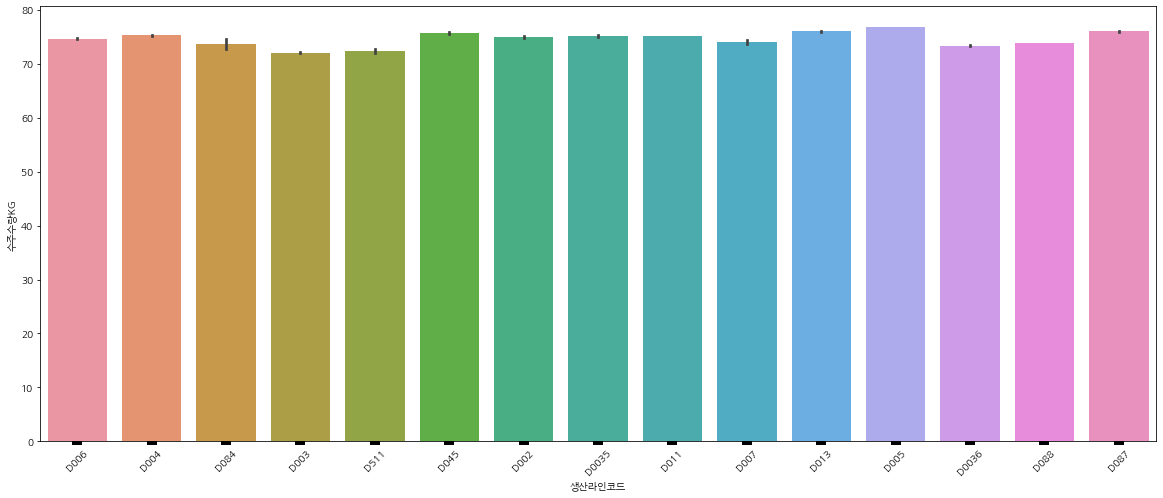

In [48]:
# 생산라인-수량 바플랏 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x=product_booking_cooking_no_ideal_w5['생산라인코드']
y=product_booking_cooking_no_ideal_w5['수주수량KG']
sns.barplot(x=x,y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

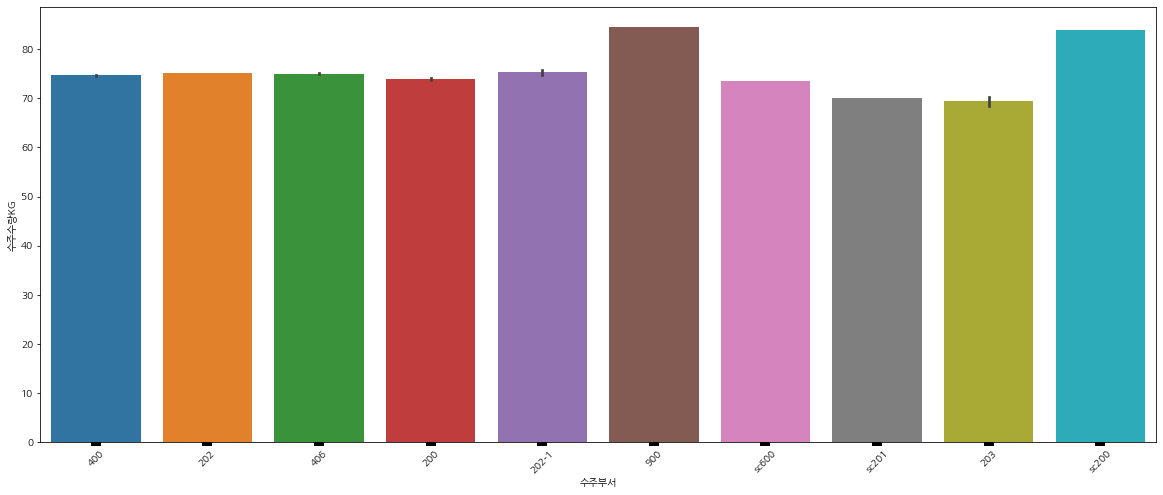

In [49]:
# 수주부서-수량 라인플랏 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x=product_booking_cooking_no_ideal_w5['수주부서']
y=product_booking_cooking_no_ideal_w5['수주수량KG']
sns.barplot(x=x,y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

### 해당 품목 랜덤포레스트 모델 만들기 전처리

In [29]:
product_booking_cooking_no_ideal.groupby('품목코드_통일').count().sort_values(by='생산시간')

,품목명,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일
품목코드_통일,,,,,,,,,,,,,,
1BA03526,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13L00038,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13P01254,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13K01432,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13A00897,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16A03020,10280,10280,10280,10280,10280,10280,10280,10280,10280,10280,10280,10280,10280,10280
13D01286,12420,12420,12420,12420,12420,12420,12420,12420,12420,12420,12420,11340,12420,12420
13R07051,15712,15712,15712,15712,15712,15712,15712,15712,15712,15712,15712,15712,15712,15712


In [30]:
subset = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목코드_통일'] == '16A01063']

In [ ]:
# # 수주일자를 index로
# subset.index = subset['수주일자']

## 모델링 테스트 전처리

In [ ]:
subset

In [88]:
subset['생산시간'].unique()

array([78.41, 74.69, 78.71, 75.12, 73.11, 70.88, 77.71, 73.5 ,   nan,
       74.98, 79.55, 77.31, 79.37, 79.83, 74.34, 71.19, 75.28, 79.54,
       74.23, 74.68, 72.2 , 74.11, 72.17, 72.99, 78.56])

In [153]:
product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['출하완료여부']=='N']

,품목명,품목코드_통일,수주부서,수주일자,수주단위,출고수량KG,수주수량KG,출하완료여부,납기일자,생산라인코드,생산일자,작업장코드,생산시간,생산일자_년월일,수주일자_년월일,수주일자_년월,생산일자_년월
1866,초고추장E 200g,13A00688,202,20200504,EA,78.0,78.0,N,20200504,C045,2019-01-23,W003,77.69,2019-01-23,2020-05-04,202005,201901
1867,초고추장E 200g,13A00688,202,20200504,EA,78.0,78.0,N,20200504,P004,2019-05-20,W007,78.38,2019-05-20,2020-05-04,202005,201905
1868,초고추장E 200g,13A00688,202,20200504,EA,78.0,78.0,N,20200504,D004,2020-04-28,W005,71.91,2020-04-28,2020-05-04,202005,202004
1869,초고추장E 200g,13A00688,202,20200504,EA,78.0,78.0,N,20200504,D004,2020-04-28,W005,79.86,2020-04-28,2020-05-04,202005,202004
1870,초고추장E 200g,13A00688,202,20200504,EA,78.0,78.0,N,20200504,P004,2020-06-19,W007,77.75,2020-06-19,2020-05-04,202005,202006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233520,시아스바베큐소스(재),13K03060,202,20211101,kg,60.0,60.0,N,20211101,C001,2021-04-07,W003,71.47,2021-04-07,2021-11-01,202111,202104
233676,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20200504,EA,77.5,77.5,N,20200504,C096,2021-09-07,W003,78.94,2021-09-07,2020-05-04,202005,202109
233677,홈스타일봉골레파스타소스(재)/14일에이징출고,13S01394,202,20200504,EA,77.5,77.5,N,20200504,C096,2021-09-07,W003,75.62,2021-09-07,2020-05-04,202005,202109
233926,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20210524,EA,81.0,81.0,N,20210523,C098,2019-11-28,W003,76.88,2019-11-28,2021-05-24,202105,201911


In [144]:
product_booking_cooking_no_ideal_sample = product_booking_cooking_no_ideal.sample(n=54416)

In [146]:
product_booking_cooking_no_ideal_sample['수주수량KG_소스'] = product_booking_cooking_no_ideal_source['수주수량KG']

In [147]:
product_booking_cooking_no_ideal_sample.corr('pearson')

,수주일자,출고수량KG,수주수량KG,납기일자,생산시간,수주수량KG_소스
수주일자,1.000000,0.090346,0.022865,0.739933,0.020661,0.008742
출고수량KG,0.090346,1.000000,0.125353,0.074012,0.006708,0.140154
수주수량KG,0.022865,0.125353,1.000000,0.009398,0.034477,1.000000
납기일자,0.739933,0.074012,0.009398,1.000000,0.020746,-0.015104
생산시간,0.020661,0.006708,0.034477,0.020746,1.000000,0.011485
수주수량KG_소스,0.008742,0.140154,1.000000,-0.015104,0.011485,1.000000


In [141]:
product_booking_cooking_no_ideal.corrwith(other = product_booking_cooking_no_ideal_source, method = 'pearson')

수주일자      1.0
출고수량KG    1.0
수주수량KG    1.0
납기일자      1.0
생산시간      1.0
dtype: float64

In [116]:
# 일자와 수량 서브셋 생성
subset_plot=pd.DataFrame()
subset_plot=subset[['생산일자_년월일','수주수량KG','생산시간']]
subset_plot

,생산일자_년월일,수주수량KG,생산시간
2947658,2019-02-12,72.0,78.41
2947659,2019-03-23,72.0,74.69
2947660,2019-03-25,72.0,78.71
2947661,2019-03-25,72.0,75.12
2947662,2019-04-08,72.0,73.11
...,...,...,...
3589413,2020-09-16,84.0,NaN
3589414,2020-11-16,84.0,74.11
3589415,2021-05-03,84.0,72.17
3589416,2021-05-03,84.0,72.99


In [117]:
subset_plot['생산시간'].unique()

array([78.41, 74.69, 78.71, 75.12, 73.11, 70.88, 77.71, 73.5 ,   nan,
       74.98, 79.55, 77.31, 79.37, 79.83, 74.34, 71.19, 75.28, 79.54,
       74.23, 74.68, 72.2 , 74.11, 72.17, 72.99, 78.56])

In [119]:
# nan 제거
subset_plot_nan = subset_plot.dropna(subset=['생산시간'])
subset_plot_sort_day_nan = subset_plot_nan.groupby('생산일자_년월일',as_index=False)['생산시간'].mean().sort_values(by=['생산일자_년월일'])
subset_plot_sort_day_nan

,생산일자_년월일,생산시간
0,2019-02-12,78.410
1,2019-03-23,74.690
2,2019-03-25,76.915
3,2019-04-08,71.995
4,2019-04-16,77.710
5,2019-05-20,73.500
6,2019-06-04,74.980
7,2019-06-17,79.550
8,2019-07-09,77.310
9,2019-07-19,79.600


In [120]:
subset_plot_nan['생산시간'].unique()

array([78.41, 74.69, 78.71, 75.12, 73.11, 70.88, 77.71, 73.5 , 74.98,
       79.55, 77.31, 79.37, 79.83, 74.34, 71.19, 75.28, 79.54, 74.23,
       74.68, 72.2 , 74.11, 72.17, 72.99, 78.56])

In [ ]:
subset_plot_nan_30 = subset_plot_nan[subset_plot_nan['수주일자_년월일'] == '2021-10-30']
time = subset_plot_nan_30['생산시간']
time

In [114]:
len(time)

50

In [115]:
sum = 0
for i in time:
    sum = sum+i
sum/len(time)

75.6068

In [97]:
subset_plot_sort_day_nan['생산시간'].unique()

array([75.6068])

In [121]:
# 생산시간 날짜별로 정렬
subset_plot_sort_day = subset_plot.groupby('생산일자_년월일',as_index=False)['생산시간'].mean().sort_values(by=['생산일자_년월일'])
subset_plot_sort_day

,생산일자_년월일,생산시간
0,2019-02-12,78.410
1,2019-03-23,74.690
2,2019-03-25,76.915
3,2019-04-08,71.995
4,2019-04-16,77.710
5,2019-05-20,73.500
6,2019-05-27,NaN
7,2019-06-04,74.980
8,2019-06-17,79.550
9,2019-07-09,77.310


In [123]:
subset_plot_sort_day['생산시간'].mean()

75.6428947368421

In [125]:
subset_plot_sort_day = subset_plot_sort_day.fillna(75.643)

In [98]:
subset_plot_sort_day['생산시간'].unique()

array([75.6068])

In [126]:
# 날짜를 인덱스로
subset_plot_sort_day = subset_plot_sort_day.set_index('생산일자_년월일')
subset_plot_sort_day

,생산시간
생산일자_년월일,
2019-02-12,78.410
2019-03-23,74.690
2019-03-25,76.915
2019-04-08,71.995
2019-04-16,77.710
2019-05-20,73.500
2019-05-27,75.643
2019-06-04,74.980
2019-06-17,79.550


In [105]:
# 수량 일자 날짜별로 정렬
subset_plot_sort_kg = subset_plot.groupby('수주일자_년월일',as_index=False)['수주수량KG'].sum().sort_values(by=['수주일자_년월일'])
subset_plot_sort_kg

,수주일자_년월일,수주수량KG
0,2019-01-04,6912.0
1,2019-01-08,2764.8
2,2019-01-09,1382.4
3,2019-01-10,2764.8
4,2019-01-15,6912.0
...,...,...
60,2019-09-16,5529.6
61,2019-11-05,5529.6
62,2020-01-07,6912.0
63,2020-01-29,7200.0


In [106]:
# 날짜를 인덱스로
subset_plot_sort_kg = subset_plot_sort_kg.set_index('수주일자_년월일')
subset_plot_sort_kg

,수주수량KG
수주일자_년월일,
2019-01-04,6912.0
2019-01-08,2764.8
2019-01-09,1382.4
2019-01-10,2764.8
2019-01-15,6912.0
...,...
2019-09-16,5529.6
2019-11-05,5529.6
2020-01-07,6912.0


In [109]:
# 전날 수량값으로 채운 데이터프레임 만들기
def model(x):
    subset_plot_sort_test_model = subset_plot_sort_kg.tail(x)
    subset_plot_sort_test_model 
    for i in range(x):
        df_shifted = subset_plot_sort_kg.shift(i+1)
        df_shifted = df_shifted.dropna()
        day = df_shifted.tail(x).values
        subset_plot_sort_test_model[f'day{i+1}'] =day
        subset_plot_sort_test_model= subset_plot_sort_test_model.iloc[:,:3].copy()
    return subset_plot_sort_test_model

In [110]:
subset_plot_sort_test_model= model(10)
subset_plot_sort_test_model

,수주수량KG,day1,day2
수주일자_년월일,,,
2019-08-22,6912.0,5529.6,6912.0
2019-08-23,5529.6,6912.0,5529.6
2019-08-29,11059.2,5529.6,6912.0
2019-09-10,2764.8,11059.2,5529.6
2019-09-11,5529.6,2764.8,11059.2
2019-09-16,5529.6,5529.6,2764.8
2019-11-05,5529.6,5529.6,5529.6
2020-01-07,6912.0,5529.6,5529.6
2020-01-29,7200.0,6912.0,5529.6


In [111]:
subset_plot_sort_day_10 = subset_plot_sort_day.tail(10)
subset_plot_sort_day_10

,생산시간
수주일자_년월일,
2019-08-22,76.343333
2019-08-23,76.343333
2019-08-29,76.343333
2019-09-10,76.343333
2019-09-11,76.343333
2019-09-16,76.343333
2019-11-05,76.343333
2020-01-07,76.343333
2020-01-29,76.343333


In [90]:
# 생산시간 합치기
subset_plot_sort_test_model['생산시간'] = subset_plot_sort_day.tail(10).values
subset_plot_sort_test_model

,수주수량KG,day1,day2,day3,day4,day5,생산시간
수주일자_년월일,,,,,,,
2019-08-22,6912.0,5529.6,6912.0,5529.6,11059.2,11059.2,76.343333
2019-08-23,5529.6,6912.0,5529.6,6912.0,5529.6,11059.2,76.343333
2019-08-29,11059.2,5529.6,6912.0,5529.6,6912.0,5529.6,76.343333
2019-09-10,2764.8,11059.2,5529.6,6912.0,5529.6,6912.0,76.343333
2019-09-11,5529.6,2764.8,11059.2,5529.6,6912.0,5529.6,76.343333
2019-09-16,5529.6,5529.6,2764.8,11059.2,5529.6,6912.0,76.343333
2019-11-05,5529.6,5529.6,5529.6,2764.8,11059.2,5529.6,76.343333
2020-01-07,6912.0,5529.6,5529.6,5529.6,2764.8,11059.2,76.343333
2020-01-29,7200.0,6912.0,5529.6,5529.6,5529.6,2764.8,76.343333


#### 시계열 모델

<Figure size 432x288 with 0 Axes>

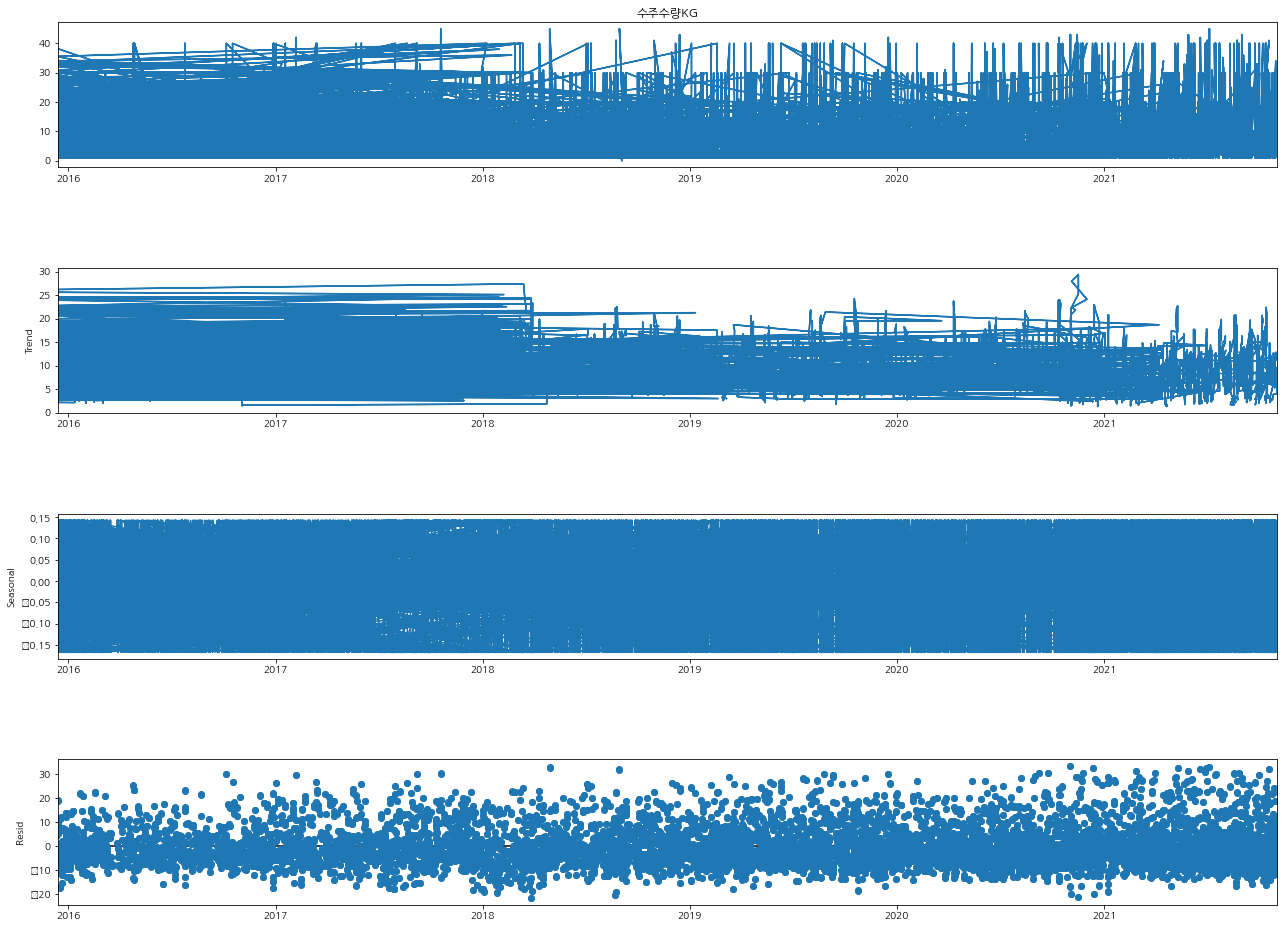

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(subset_plot['수주수량KG'], model='additive', freq=7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [ ]:
import numpy as np
from scipy import stats  #  과학용 계산 라이브러리
from sklearn.datasets import load_boston  #  사이킷런 데이타셋
from sklearn.model_selection import train_test_split 
# 트레인/테스트 데이터 나누기
from sklearn.linear_model import LinearRegression #  모델 학습
from sklearn.metrics import mean_squared_error #  에러 계산
import warnings
warnings.filterwarnings('ignore') # 경고무시

y=subset_plot['수주수량KG'] 

y_train, y_test = train_test_split(y,test_size=0.2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(y_train, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.수주수량KG   No. Observations:                15951
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -57876.089
Method:                       css-mle   S.D. of innovations              9.108
Date:                Wed, 30 Nov 2022   AIC                         115764.178
Time:                        05:44:12   BIC                         115810.242
Sample:                             1   HQIC                        115779.416
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.451e-06   2.75e-05     -0.343      0.732   -6.34e-05    4.45e-05
ar.L1.D.수주수량KG    -0.9837      0.022    -43.736      0.000      -1.028      -0.940
ar.L2.D.수주수량KG     0.0031      0.008

In [ ]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.
forecast_data

(array([9.05535836, 9.03941837, 9.03674472, 9.03930693, 9.0367595 ]),
 array([9.10837337, 9.10845055, 9.10845133, 9.10845563, 9.10845638]),
 array([[-8.79672541, 26.90744212],
        [-8.81281667, 26.89165341],
        [-8.81549185, 26.88898129],
        [-8.81293806, 26.89155192],
        [-8.81548696, 26.88900595]]))

In [ ]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. 
y_test # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(y_test, color="green") # 실제 가격 그래프입니다.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1bfe24c560> (for post_execute):


ValueError: ignored

ValueError: ignored

### 머신러닝 - 랜덤 포레스트

In [67]:
import numpy as np
from scipy import stats  #  과학용 계산 라이브러리
from sklearn.datasets import load_boston  #  사이킷런 데이타셋
from sklearn.model_selection import train_test_split 
# 트레인/테스트 데이터 나누기
from sklearn.linear_model import LinearRegression #  모델 학습
from sklearn.metrics import mean_squared_error #  에러 계산
import warnings
warnings.filterwarnings('ignore') # 경고무시

In [91]:
# 인풋, 타겟 설정
x=subset_plot_sort_test_model.drop(['수주수량KG'], axis=1) # input
y=subset_plot_sort_test_model['수주수량KG'] # target

In [92]:
# 트레인/ 테스트 구분
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [93]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [94]:
# 학습
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=10)
clf.fit(x_train_sc, y_train)

RandomForestRegressor(max_depth=10)

In [95]:
# 예측
y_predict = clf.predict(x_test_sc)
y_predict

array([7159.104, 6100.416])

In [96]:
# train 정확도
clf.score(x_train, y_train)

-0.10118511817353548

In [97]:
# test 정확도
clf.score(x_test, y_test)

-0.9576797067901226